# Multimodal Bankrupt Companies Dataset Overview

Presented dataset contains information about 6116 companies regarding bankruptcy from years 1995-2021. Data for 2748 companies (45% of whole dataset) were synthetically generated.
 
Dataset consists of two parts:
- financial: 17 variables for each object in 5 years period
- textual: summaries of financial reports one year before bankruptcy or last available report for health companies

The source dataset for this dataset was 'ECL' dataset describe in https://arxiv.org/abs/2401.12652. Which contains three information about companies: reference to Compustat DB for financial data, reference to financial reports for each year of company activity and information about bankruptcy status. 

## Financial dataset part


The companies in 'ECL' dataset were matched with companies in gurufocus service and scrapped from it. Unfortunately, less than half of the companies were successfully matched.

The dataset consists of 17 variables for each object in 5 years period.
Dataset was extended with synthetically generated data for positive class.

ECL github: https://github.com/henriarnoUG/ECL/tree/main

### Overview

In [32]:
import pandas as pd
import numpy as np

In [34]:
financial_dataset = pd.read_csv('bankrupt_companies-17_variables-5_years_per_object-balanced-split-matched_with_textual_data-shuffled.csv')
print(financial_dataset.shape)
financial_dataset.head(10)

(30580, 22)


,cik,label,subset,ticker,Fiscal Period,Cost of Goods Sold,"Depreciation, Depletion and Amortization",EBIT,EBITDA,Gross Profit,...,Net Income,Retained Earnings,Revenue,Total Assets,Total Current Assets,Total Current Liabilities,Total Inventories,Total Liabilities,Total Operating Expense,Total Receivables
0,138291101,True,test,NaN,NaN,216.0,143.0,-164.0,-21.0,111.0,...,-348.0,-1548.0,327.0,1345.0,247.0,130.0,1.0,1719.0,277.0,75.0
1,138291101,True,test,NaN,NaN,202.0,134.0,-97.0,37.0,98.0,...,-317.0,-1588.0,301.0,1351.0,258.0,145.0,1.0,1696.0,193.0,80.0
2,138291101,True,test,NaN,NaN,203.0,116.0,-102.0,14.0,122.0,...,-104.0,-1692.0,325.0,1392.0,388.0,169.0,3.0,1656.0,231.0,88.0
3,138291101,True,test,NaN,NaN,259.0,113.0,-66.0,47.0,191.0,...,-97.0,-1789.0,451.0,1465.0,330.0,160.0,3.0,1812.0,253.0,115.0
4,138291101,True,test,NaN,NaN,299.0,118.0,-132.0,-14.0,173.0,...,-193.0,-1984.0,472.0,1200.0,217.0,126.0,2.0,1726.0,291.0,86.0
5,1324245,False,train,SLH,Jun 2011,204.0,83.0,186.0,269.0,481.0,...,157.0,151.0,685.0,2169.0,561.0,214.0,0.0,1374.0,288.0,155.0
6,1324245,False,train,SLH,Jun 2012,246.0,104.0,218.0,321.0,545.0,...,107.0,142.0,790.0,2152.0,689.0,179.0,0.0,1454.0,325.0,150.0
7,1324245,False,train,SLH,Jun 2013,261.0,103.0,205.0,309.0,578.0,...,94.0,177.0,838.0,2258.0,658.0,217.0,0.0,1498.0,370.0,158.0
8,1324245,False,train,SLH,Jun 2014,313.0,122.0,143.0,265.0,674.0,...,-9.0,71.0,987.0,3400.0,1058.0,283.0,0.0,2693.0,468.0,176.0
9,1324245,False,train,SLH,Jun 2015,391.0,162.0,244.0,406.0,750.0,...,-101.0,-173.0,1141.0,3753.0,724.0,336.0,0.0,3503.0,540.0,178.0


Every object consist of 5 years of financial data.

Missing values were filled with fbill and ffill methods. Ticker and Fiscal period are null for synthetic samples.

In [16]:
financial_dataset.isnull().sum().sort_values(ascending=False)

ticker                                      13740
Fiscal Period                               13740
cik                                             0
Net Income                                      0
Total Operating Expense                         0
Total Liabilities                               0
Total Inventories                               0
Total Current Liabilities                       0
Total Current Assets                            0
Total Assets                                    0
Revenue                                         0
Retained Earnings                               0
Market Cap                                      0
label                                           0
Long-Term Debt                                  0
Gross Profit                                    0
EBITDA                                          0
EBIT                                            0
Depreciation, Depletion and Amortization        0
Cost of Goods Sold                              0


If objects had missing feature, then it was inserted with zeros. 

In [15]:
financial_dataset.iloc[:, 5:][financial_dataset == 0].count().sort_values(ascending=False)

Market Cap                                  14094
Total Inventories                            6474
Long-Term Debt                               1775
Depreciation, Depletion and Amortization     1644
Cost of Goods Sold                            968
Retained Earnings                             592
EBIT                                          558
EBITDA                                        541
Net Income                                    352
Total Receivables                             231
Gross Profit                                   72
Revenue                                        40
Total Operating Expense                        21
Total Current Liabilities                      15
Total Current Assets                           13
Total Liabilities                               8
Total Assets                                    6
dtype: int64

We need to group the dataset by 'cik' to get unique objects.

In [18]:
financial_data_grouped = financial_dataset.groupby('cik').agg({'label': 'first', 'subset': 'first', 'ticker': 'first'})
print(financial_data_grouped.shape)

(6116, 3)


In [19]:
financial_data_grouped['label'].value_counts()

label
False    3300
True     2816
Name: count, dtype: int64

Before extending the dataset, the distribution of the labels was strongly imbalanced in ratio 49-1. Below cell represents the distribution of the labels before extending the dataset.

In [20]:
financial_data_grouped_original_dataset = financial_data_grouped[~financial_data_grouped['ticker'].isnull()]
financial_data_grouped_original_dataset['label'].value_counts(normalize=True)

label
False    0.97981
True     0.02019
Name: proportion, dtype: float64

Artificially generated samples hasn't got 'ticker' and 'Fiscal Period' columns filled. Also 'cik' column for artificial samples is created by concatenating original 'cik' and id (which was number from 0 to 10, because of 10 synthetic samples for each object). There are some inconsistencies in the dataset - not every original sample has 10 synthetic samples.  

To oversample the minority class, the financial part of dataset was extended using SMOTE algorithm.

In [21]:
financial_data_grouped['subset'].value_counts(normalize=True)

subset
train    0.799706
test     0.150262
val      0.050033
Name: proportion, dtype: float64

### Example usage

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [76]:
financial_dataset_preprocessed = financial_dataset.drop(['cik', 'ticker', 'Fiscal Period'], axis=1)
X = financial_dataset_preprocessed.drop('label', axis=1)
y = financial_dataset_preprocessed['label']

In [81]:
def get_train_val_test_split(X, y):
    X_train = X[X['subset'] == 'train']
    y_train = y[X['subset'] == 'train']
    
    X_val = X[X['subset'] == 'val']
    y_val = y[X['subset'] == 'val']
    
    X_test = X[X['subset'] == 'test']
    y_test = y[X['subset'] == 'test']
    
    X_train = X_train.drop('subset', axis=1)
    X_val = X_val.drop('subset', axis=1)
    X_test = X_test.drop('subset', axis=1)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [82]:
X_train, y_train, X_val, y_val, X_test, y_test = get_train_val_test_split(X, y)
len(X_train), len(X_val), len(X_test)

(24455, 1530, 4595)

In [58]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [32]:
confusion_matrix(y_test, y_pred)

array([[2430,   50],
       [  37, 2078]], dtype=int64)

In [36]:
print(f'accuracy_score: {accuracy_score(y_test, y_pred)}')
print(f'f1_score: {f1_score(y_test, y_pred)}')

accuracy_score: 0.9810663764961916
f1_score: 0.9794956398774453


### Useful functions to work with the dataset

#### Functions for (de)flattening the dataset

Function flattens 5 years (rows) to single row.

In [124]:
def flatten_financial_dataset(financial_dataset):
    object_length_in_rows = 5
    per_object_columns = list(financial_dataset.columns[:object_length_in_rows].values)
    
    value_columns = financial_dataset.columns[object_length_in_rows:]
    new_columns = per_object_columns + [f'{col}_{i+1}' for i in range(object_length_in_rows) for col in value_columns]
    
    dfs = []
    
    for name, group in financial_dataset.groupby('cik'):
        label = group['label'].iloc[0]
        subset = group['subset'].iloc[0]
        ticker = group['ticker'].iloc[0]
        fiscal_periods = ';'.join(group['Fiscal Period'].astype(str).values)
    
        values = group.drop(columns=per_object_columns).values.flatten()
        
        dfs.append([name, label, subset, ticker, fiscal_periods] + values.tolist())
    
    final_flatten_df = pd.DataFrame(dfs, columns=new_columns)
    final_flatten_df = final_flatten_df.reset_index(drop=True)
    return final_flatten_df

In [125]:
flatten_df = flatten_financial_dataset(financial_dataset)
print(flatten_df.shape)
flatten_df.head()

(6116, 90)


,cik,label,subset,ticker,Fiscal Period,Cost of Goods Sold_1,"Depreciation, Depletion and Amortization_1",EBIT_1,EBITDA_1,Gross Profit_1,...,Net Income_5,Retained Earnings_5,Revenue_5,Total Assets_5,Total Current Assets_5,Total Current Liabilities_5,Total Inventories_5,Total Liabilities_5,Total Operating Expense_5,Total Receivables_5
0,1800,False,train,ABT,Dec 2016;Dec 2017;Dec 2018;Dec 2019;Dec 2020,9094.0,1353.0,1844.0,3197.0,11759.0,...,4495.0,27627.0,34608.0,72548.0,20441.0,11907.0,5012.0,39545.0,14248.0,8281.0
1,2034,True,train,NaN,nan;nan;nan;nan;nan,391.0,12.0,10.0,23.0,190.0,...,-16.0,-60.0,734.0,309.0,165.0,84.0,112.0,155.0,281.0,44.0
2,2488,False,train,AMD,Dec 2016;Dec 2017;Dec 2018;Dec 2019;Dec 2020,3316.0,133.0,-293.0,-160.0,1003.0,...,2490.0,-4605.0,9763.0,8962.0,6143.0,2417.0,1399.0,3125.0,2978.0,2076.0
3,2491,False,train,BYI,Jun 2010;Jun 2011;Jun 2012;Jun 2013;Jun 2014,274.0,75.0,155.0,230.0,484.0,...,99.0,745.0,1215.0,2519.0,593.0,252.0,82.0,2312.0,537.0,314.0
4,2852,True,train,NaN,nan;nan;nan;nan;nan,87.0,36.0,38.0,74.0,200.0,...,-79.0,-288.0,292.0,427.0,49.0,569.0,5.0,590.0,169.0,14.0


In [120]:
flatten_financial_dataset_preprocessed = flatten_df.drop(['cik', 'ticker', 'Fiscal Period'], axis=1)
X = flatten_financial_dataset_preprocessed.drop('label', axis=1)
y = flatten_financial_dataset_preprocessed['label']

X_train, y_train, X_val, y_val, X_test, y_test = get_train_val_test_split(X, y)
len(X_train), len(X_val), len(X_test)

(4891, 306, 919)

In [121]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [122]:
confusion_matrix(y_test, y_pred)

array([[490,   6],
       [  1, 422]], dtype=int64)

In [123]:
print(f'accuracy_score: {accuracy_score(y_test, y_pred)}')
print(f'f1_score: {f1_score(y_test, y_pred)}')

accuracy_score: 0.9923830250272034
f1_score: 0.9917743830787309


Flattening the dataset slightly improves the results by ~1%.

### De-flattening the dataset

In [88]:
flatten_df.head()

,cik,label,subset,Cost of Goods Sold_1,"Depreciation, Depletion and Amortization_1",EBIT_1,EBITDA_1,Gross Profit_1,Long-Term Debt_1,Market Cap_1,...,Net Income_5,Retained Earnings_5,Revenue_5,Total Assets_5,Total Current Assets_5,Total Current Liabilities_5,Total Inventories_5,Total Liabilities_5,Total Operating Expense_5,Total Receivables_5
0,1800,False,train,9094.0,1353.0,1844.0,3197.0,11759.0,20681.0,56573.0,...,4495.0,27627.0,34608.0,72548.0,20441.0,11907.0,5012.0,39545.0,14248.0,8281.0
1,2034,True,train,391.0,12.0,10.0,23.0,190.0,16.0,0.0,...,-16.0,-60.0,734.0,309.0,165.0,84.0,112.0,155.0,281.0,44.0
2,2488,False,train,3316.0,133.0,-293.0,-160.0,1003.0,1435.0,10603.0,...,2490.0,-4605.0,9763.0,8962.0,6143.0,2417.0,1399.0,3125.0,2978.0,2076.0
3,2491,False,train,274.0,75.0,155.0,230.0,484.0,500.0,1806.0,...,99.0,745.0,1215.0,2519.0,593.0,252.0,82.0,2312.0,537.0,314.0
4,2852,True,train,87.0,36.0,38.0,74.0,200.0,355.0,17.0,...,-79.0,-288.0,292.0,427.0,49.0,569.0,5.0,590.0,169.0,14.0


In [147]:
def deflatten_financial_dataset(flatten_df):
    object_length_in_rows = 5
    info_columns_count = 5

    values_columns = flatten_df.columns[info_columns_count:]
    unique_values_columns = sorted(set(col.split('_')[0] for col in values_columns))
    
    new_columns = flatten_df.columns[:info_columns_count].tolist() + unique_values_columns

    deflattened_rows = []

    for _, row in flatten_df.iterrows():
        first_columns = row.values[:info_columns_count]
        fiscal_periods = row.values[4].split(';')
        
        reshaped_values = np.array(row.values[info_columns_count:]).reshape(object_length_in_rows, -1)
        
        for i in range(object_length_in_rows):
            new_row = np.concatenate([first_columns[:4], [fiscal_periods[i]], reshaped_values[i]])
            deflattened_rows.append(new_row)

    deflatten_df = pd.DataFrame(deflattened_rows, columns=new_columns)
    
    return deflatten_df.reset_index(drop=True)

In [148]:
deflatten_df = deflatten_financial_dataset(flatten_df)
deflatten_df.head()

,cik,label,subset,ticker,Fiscal Period,Cost of Goods Sold,"Depreciation, Depletion and Amortization",EBIT,EBITDA,Gross Profit,...,Net Income,Retained Earnings,Revenue,Total Assets,Total Current Assets,Total Current Liabilities,Total Inventories,Total Liabilities,Total Operating Expense,Total Receivables
0,1800,False,train,ABT,Dec 2016,9094.0,1353.0,1844.0,3197.0,11759.0,...,1400.0,25565.0,20853.0,52666.0,26776.0,6660.0,2434.0,31949.0,8733.0,5054.0
1,1800,False,train,ABT,Dec 2017,12409.0,3021.0,3135.0,6156.0,14981.0,...,477.0,23978.0,27390.0,76250.0,20147.0,8912.0,3601.0,45152.0,13417.0,6916.0
2,1800,False,train,ABT,Dec 2018,12706.0,3278.0,3699.0,6977.0,17872.0,...,2368.0,24560.0,30578.0,67173.0,14632.0,9012.0,3796.0,36451.0,14222.0,6750.0
3,1800,False,train,ABT,Dec 2019,13231.0,3014.0,4747.0,7761.0,18673.0,...,3687.0,25847.0,31904.0,67887.0,15667.0,10863.0,4316.0,36586.0,14141.0,7211.0
4,1800,False,train,ABT,Dec 2020,15003.0,3327.0,5514.0,8841.0,19605.0,...,4495.0,27627.0,34608.0,72548.0,20441.0,11907.0,5012.0,39545.0,14248.0,8281.0


#### Function for shuffling the dataset

In [49]:
import random

def shuffle_data_by_object(df):

    data = df.values.tolist()
    shuffled_data = []
    object_data = {}

    for row in data:
        cik = row[0]
        if cik not in object_data:
            object_data[cik] = []
        object_data[cik].append(row)

    shuffled_object_keys = list(object_data.keys())
    random.shuffle(shuffled_object_keys)

    for cik in shuffled_object_keys:
        shuffled_data.extend(object_data[cik])

    shuffled_df = pd.DataFrame(shuffled_data, columns=df.columns)
    return shuffled_df

shuffled_df = shuffle_data_by_object(financial_dataset)
shuffled_df.head(10)

,cik,label,subset,ticker,Fiscal Period,Cost of Goods Sold,"Depreciation, Depletion and Amortization",EBIT,EBITDA,Gross Profit,...,Net Income,Retained Earnings,Revenue,Total Assets,Total Current Assets,Total Current Liabilities,Total Inventories,Total Liabilities,Total Operating Expense,Total Receivables
0,311602,True,train,NaN,NaN,75.0,34.0,-210.0,-175.0,18.0,...,-207.0,-355.0,93.0,418.0,153.0,41.0,0.0,196.0,229.0,21.0
1,311602,True,train,NaN,NaN,72.0,32.0,-192.0,-160.0,14.0,...,-198.0,-365.0,86.0,420.0,156.0,45.0,0.0,190.0,206.0,23.0
2,311602,True,train,NaN,NaN,92.0,36.0,-139.0,-102.0,35.0,...,-141.0,-367.0,128.0,954.0,439.0,73.0,0.0,406.0,173.0,33.0
3,311602,True,train,NaN,NaN,187.0,1012.0,-1259.0,-245.0,222.0,...,-1262.0,-1629.0,410.0,8147.0,607.0,241.0,0.0,1098.0,1479.0,91.0
4,311602,True,train,NaN,NaN,326.0,2097.0,-6266.0,-4169.0,330.0,...,-6424.0,-8054.0,655.0,2092.0,368.0,289.0,0.0,1183.0,6594.0,126.0
5,791963,False,train,OPY,Dec 2016,610.0,8.0,-2.0,6.0,248.0,...,-1.0,410.0,858.0,2237.0,1047.0,627.0,0.0,1724.0,131.0,944.0
6,791963,False,train,OPY,Dec 2017,626.0,6.0,48.0,54.0,295.0,...,23.0,427.0,920.0,2439.0,1037.0,552.0,0.0,1915.0,133.0,946.0
7,791963,False,train,OPY,Dec 2018,630.0,7.0,91.0,98.0,328.0,...,29.0,450.0,958.0,2240.0,983.0,583.0,0.0,1695.0,136.0,824.0
8,791963,False,train,OPY,Dec 2019,680.0,33.0,121.0,153.0,354.0,...,53.0,497.0,1033.0,2465.0,1137.0,666.0,0.0,1872.0,144.0,1009.0
9,791963,False,train,OPY,Dec 2020,794.0,33.0,185.0,218.0,405.0,...,123.0,601.0,1199.0,2714.0,1479.0,568.0,0.0,2028.0,144.0,1360.0


## Textual data

Textual data was being prepared after the financial part. For companies that were matched with gurufocus, the textual data was accessible through: https://cloud.ilabt.imec.be/index.php/s/yrQneXG74bNYxLp, as the authors of the 'ECL' dataset provided the textual data - financial reports scrapped from edgar database.

The textual data was intended to be used be lightweight models like BERT. Furthermore, the crucial MD&A section form financial report has 6,810 words on average.
That is why it was necessary to shorten the text, in this case to 512 tokens.

Two models gemini-1.0-pro and gemini-1.5-pro-latest utilised through api were prompted with following text:
```
"You are a financial analyst, specialized in assessing companies' financial health and communicating with clients.
I have the management discussion and analysis from a company's 10k report, and I would like to know the elements that could indicate its financial health.
Provide a concise summary of the most important information from the investor perspective from the included text,
focusing on information about financial performance (e.g., revenue, profitability, liquidity and capital resources),
risks (industry Trends, competition, market fluctuations), or future outlook (e.g., growth strategies, acquisitions).
Do not split to paragraphs, give just list of sentence that make a summary out of the text.
Text: {text_for_prompt}, where text is a management's discussion and analysis section from a 10-K report,
with a maximum length of around 15000 words. Try to generate answer between 256 and 512 tokens length."
```

Created dataset is matched with above financial dataset and is corresponding to the same companies.
Positive class was oversampled through process of generation synonymous texts leveraging "https://api.ai21.com/studio/v1/paraphrase" endpoint. Also for almost every original summary, there is a copy of it made through another call to gemini models. As a result, the dataset is almost balanced.

### Overview

In [22]:
textual_dataset = pd.read_csv('textual_data-matched_and_aligned_with_fin_data-split.csv')
print(textual_dataset.shape)
textual_dataset.head()

(6116, 4)


,cik,label,subset,text
0,138291101,True,test,"As a biopharmaceutical company, Contrave is fo..."
1,1324245,False,train,Solera is a global provider of software and se...
2,1178670,False,train,The company is a commercial-stage biopharmaceu...
3,117871706,True,train,This decline was largely driven by the decline...
4,94577107,True,train,"Losses, negative cash flows, and a working cap..."


In [23]:
textual_dataset['label'].value_counts()

label
False    3300
True     2816
Name: count, dtype: int64

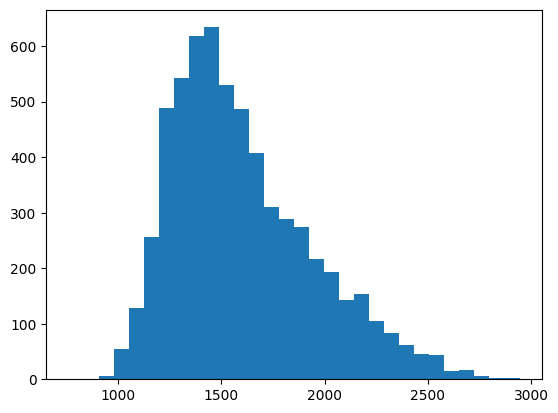

In [24]:
import matplotlib.pyplot as plt

text_lengths = [len(text) for text in textual_dataset['text'].values]
plt.hist(text_lengths, bins=30)
plt.show()

### Example usage

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

import string

In [28]:
def preprocess_text(text):
  text = text.lower()
  text = text.translate(str.maketrans('', '', string.punctuation))
  return text

In [29]:
X = textual_dataset['text'].apply(preprocess_text)
y = textual_dataset['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
vectorizer = TfidfVectorizer(max_features=1000)
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

<1x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [165]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train_features, y_train)

y_pred = model.predict(X_test_features)

In [166]:
confusion_matrix(y_test, y_pred)

array([[640,  20],
       [ 35, 529]], dtype=int64)

In [167]:
print(f'accuracy_score: {accuracy_score(y_test, y_pred)}')
print(f'f1_score: {f1_score(y_test, y_pred)}')

accuracy_score: 0.9550653594771242
f1_score: 0.9505840071877808


In [169]:
new_texts = [
    "The company is experiencing steady revenue growth and profitability.",
    "The company is facing a class-action lawsuit and a potential product recall.",
    "The company is struggling to meet its financial obligations and may be at risk of bankruptcy."
]

for text in new_texts:
    new_text_features = vectorizer.transform([preprocess_text(text)])
    prediction = model.predict(new_text_features)[0]
    
    if prediction:
        print(f"Text: {text}\nPredicted: Bankruptcy")
    else:
        print(f"Text: {text}\nPredicted: Not Bankruptcy")

Text: The company is experiencing steady revenue growth and profitability.
Predicted: Not Bankruptcy
Text: The company is facing a class-action lawsuit and a potential product recall.
Predicted: Not Bankruptcy
Text: The company is struggling to meet its financial obligations and may be at risk of bankruptcy.
Predicted: Bankruptcy


### Useful functions to work with the dataset

#### Function aligning the textual dataset with financial dataset

Shuffle the financial dataset and then check if the textual dataset is aligned with the financial dataset after using custom function.

In [81]:
financial_dataset_shuffled = shuffle_data_by_object(financial_dataset)
financial_dataset_shuffled.head(10)

,cik,label,subset,ticker,Fiscal Period,Cost of Goods Sold,"Depreciation, Depletion and Amortization",EBIT,EBITDA,Gross Profit,...,Net Income,Retained Earnings,Revenue,Total Assets,Total Current Assets,Total Current Liabilities,Total Inventories,Total Liabilities,Total Operating Expense,Total Receivables
0,121135108,True,train,NaN,NaN,395.0,13.0,23.0,37.0,267.0,...,9.0,52.0,664.0,314.0,189.0,85.0,142.0,183.0,245.0,10.0
1,121135108,True,train,NaN,NaN,395.0,13.0,23.0,37.0,267.0,...,9.0,52.0,664.0,314.0,189.0,85.0,142.0,183.0,245.0,10.0
2,121135108,True,train,NaN,NaN,414.0,14.0,19.0,34.0,280.0,...,7.0,58.0,696.0,344.0,206.0,101.0,151.0,204.0,262.0,11.0
3,121135108,True,train,NaN,NaN,422.0,17.0,5.0,22.0,261.0,...,-1.0,55.0,682.0,345.0,203.0,91.0,153.0,206.0,256.0,10.0
4,121135108,True,train,NaN,NaN,391.0,21.0,-30.0,-9.0,219.0,...,-23.0,28.0,610.0,316.0,167.0,82.0,132.0,201.0,250.0,8.0
5,105631210,True,train,NaN,NaN,28.0,0.0,-12.0,-11.0,16.0,...,-122.0,-243.0,44.0,746.0,372.0,97.0,0.0,666.0,28.0,16.0
6,105631210,True,train,NaN,NaN,28.0,0.0,-12.0,-11.0,16.0,...,-122.0,-243.0,44.0,746.0,372.0,97.0,0.0,666.0,28.0,16.0
7,105631210,True,train,NaN,NaN,227.0,0.0,-8.0,-7.0,127.0,...,-249.0,-526.0,354.0,2514.0,1245.0,390.0,0.0,2070.0,135.0,165.0
8,105631210,True,train,NaN,NaN,504.0,63.0,-80.0,-17.0,319.0,...,-663.0,-1188.0,823.0,4282.0,1628.0,677.0,0.0,3026.0,400.0,274.0
9,105631210,True,train,NaN,NaN,629.0,132.0,-399.0,-267.0,372.0,...,-1935.0,-3125.0,1001.0,2794.0,846.0,1233.0,0.0,3271.0,772.0,250.0


In [82]:
def match_textual_data_with_financial_data(textual_dataset, financial_dataset):
    financial_dataset_ciks = financial_dataset['cik'].unique()
    
    textual_dataset_copy = textual_dataset.copy()
    textual_dataset_copy['cik'] = pd.Categorical(textual_dataset_copy['cik'], categories=financial_dataset_ciks, ordered=True)
    textual_dataset_copy = textual_dataset_copy.sort_values('cik').reset_index(drop=True)
    
    assert financial_dataset_ciks.tolist() == textual_dataset_copy['cik'].tolist()
    
    return textual_dataset_copy

In [83]:
textual_dataset_copy = match_textual_data_with_financial_data(textual_dataset, financial_dataset_shuffled)
textual_dataset_copy.head()

,cik,label,subset,text
0,121135108,True,train,"Retailwinds operates 387 specialty women's stores and an eCommerce business under the New York & Company and Fashion to Figure brands. In light of the COVID-19 pandemic, the company's revenues, results of operations, and cash flows have been negatively affected, giving rise to substantial doubts about its ability to continue operations as a going concern. Compared to the prior year, net sales decreased by 5.4%, resulting in a net loss of $61.6 million as compared to a net income of $4.2 million from comparable store sales. Increasing promotional activity, a drop in sales leverage, and higher shipping costs led to a decrease in gross profit margin to 28.1% for the company. Although the company targeted customer acquisition and grow its digital and new brands, it continued to lose money, with operating losses of $61.9 million, significantly impacted by an impairment charge of $20.6 million on store assets. In February 2020, the company's revolving credit facility had been drawn down by $40 million. This left $43.5 million available. As a result, management believes that existing cash resources and cash flow from operations will not be sufficient to meet fiscal year 2020's working capital and capital expenditure requirements. Investors are likely to be left with nothing following a restructuring or bankruptcy filing by RTW Retailwinds. Precarious financial health and uncertain future prospects threaten the company."
1,105631210,True,train,"Vlasic Foods International experienced a 24.1% decrease in net sales in fiscal 2000, largely due to the divestiture of the Kattus and Swift-Armour businesses. Excluding divestitures, net sales declined 6.7% due to decreased Swanson U.S. consumption, unfavorable product mix in the Vlasic pickle business, and competitive pressures in the UK. The company recorded a loss from continuing operations of $(28.6) million, significantly impacted by lower sales, reduced gross margins, increased marketing costs, and charges related to trade marketing estimates. Vlasic Foods is facing a going concern matter due to operating losses and non-compliance with financial covenants under its senior credit facility. The company received a waiver through February 28, 2001, subject to conditions including an escrow deposit for a January 2001 interest payment and repayment of the senior credit facility. Vlasic has hired Lazard Freres & Co. to explore strategic opportunities, including the potential sale of the company in whole or in parts, to address its financial situation. The company's ability to operate as a going concern hinges on the successful execution of its strategic plans and the avoidance of default under its senior credit facility. Vlasic's liquidity is strained, relying heavily on borrowings and facing restrictions due to covenant violations. Future performance depends on the outcome of the strategic review, successful divestitures, and the ability to achieve cost savings and improve profitability. Investors should carefully consider the significant risks associated with Vlasic Foods International's financial health and its ability to continue as a going concern."
2,1620280,False,test,"Uniti Group Inc. is a REIT focused on communications infrastructure, deriving substantial revenue from a long-term lease with Windstream Holdings. Windstream's bankruptcy filing in 2019 raises going concern doubts for Uniti, especially as Windstream's litigation challenges the lease's validity. Uniti and Windstream reached a settlement agreement in March 2020, subject to court approval and other conditions. The settlement includes a $400 million cash payment to Windstream, stock sale proceeds, asset transfers, and revised lease agreements, including $1.75 billion in growth capital investments over 10 years. Uniti's 2019 revenue increased to $1.03 billion, primarily due to lease and fiber infrastructure revenues. The company faced challenges, including Windstream's bankruptcy, l